# 4.3微分  
- 数値微分の実装

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x;

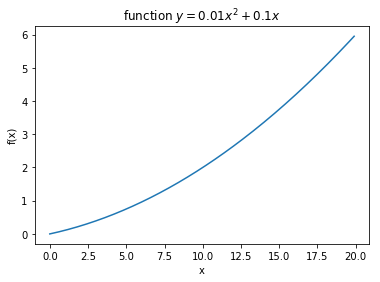

In [4]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel('f(x)')
plt.plot(x,y)
plt.title('function $ y = 0.01x^2 + 0.1x $')
plt.show()

In [5]:
result = numerical_diff(function_1, 5)
print(result)

result = numerical_diff(function_1, 10)
print(result)


0.1999999999990898
0.2999999999986347


0.1999999999990898


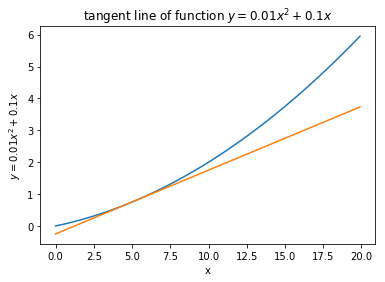

In [6]:
# coding: utf-8
#実際に接点をプロット
import numpy as np
import matplotlib.pylab as plt

# tangentは正接という意味らしい
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y



x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("$ y = 0.01x^2 + 0.1x $")
plt.title('tangent line of function $ y = 0.01x^2 + 0.1x $')

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 4.4 勾配  


- 勾配とは  
すべての変数の偏微分をベクトルとしてまとめたものを勾配という  
  
  

- 例
$$ f(x_0,x_1) = x_0^2 + x_1^2 $$
x0とx1に対しての勾配を求める  

$$
\left(
\frac{\partial f}{\partial x_0},  \frac{\partial f}{\partial x_1}
\right)
$$




In [7]:
import numpy as np
import matplotlib.pylab as plt

In [8]:
#上記の関数の実装
def function_2(x):
    return x[0]**2 + x[1]**2
    #return np.sum(x**2)

# 勾配計算の実装

In [9]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じカタチの配列作成 

    for idx in range(x.size):
        #編集する前に保存
        tmp_val = x[idx]

        # f(x + h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        #gradに値を入れていく
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        #保存していたものを読み出す
        x[idx] = tmp_val

    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# 勾配のプロット  
ch04/gradient_2d.py  
のソース  
図4-9を表示する処理  
___

# 4.4.1勾配降下法  
- 損失関数が最小となるパラメータを見つけるために勾配を利用する（最小もしくはできるだけ小さな値）  
- 勾配の指す方向（ベクトル）が必ず最小値だという保証はないけど、指針にしましょう  
本のサソリマークのところ  
- 勾配方向に進むことを繰り返して、関数の値を徐々に減らすことを勾配法（gradient method）と呼ぶ 

  
## 勾配法を数式で表す 
$$ \eta $$ (エータ)は学習率(learning rate)


$$
x_0 = x_0 - \eta
\frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta
\frac{\partial f}{\partial x_1}
$$

___
# 勾配降下法の実装

In [10]:
# 勾配降下法
# 最小のxの値を探す
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)




array([-6.11110793e-10,  8.14814391e-10])

# 具体例  
$$ y = x^2 - 4x + 3 $$

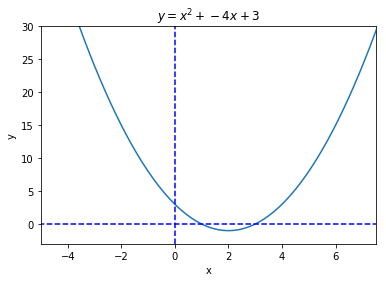

[2.]


In [11]:
# ------------------
# y = x**2 - 4x + 3 の場合
def myFunction(x):
    return x**2 - 4*x + 3


x = np.arange(-5.0, 10.0, 0.1)
y = myFunction(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title('$ y = x^2 + -4x + 3 $')

plt.plot(x, y)
plt.plot( [-10, 10], [0,0], '--b')
plt.plot( [0,0], [-3, 60], '--b')

plt.xlim(-5.0, 7.5)
plt.ylim(-3, 30)
plt.show()

init_x2 = np.array([-3.0])
result = gradient_descent(myFunction, init_x=init_x2, lr=0.1, step_num=100)
print(result)



- ch4/gradient_method.py

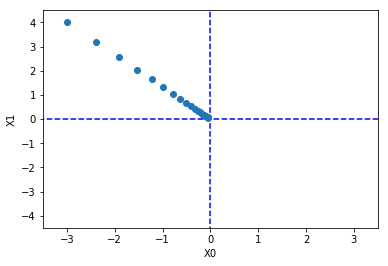

In [12]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

- ハイパーパラメータ  
自動で決定されるものではなく、人の手によって設定されるもの  


# 4.4.2 ニューラルネットワークに対する勾配  
- 2 * 3のみの重みを持つニューラルネットW  
$$
\frac{\partial L}{\partial W}
$$

- pythonでの実装  
ch04/gradient_simplenet.py


In [14]:
# 今回の例とは関係ないけど、jupyter使っているときに
# １回読み込んだファイルを再度読み込みしたい場合、
# このように自動で読み込む、みたいなことをできるようです。
%load_ext autoreload

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

# 再度リロードする指定（%load_ext autoreload）
# これによってcommon.gradientを再度読み込んでくれる
%autoreload

class simpleNet:
    def __init__(self):
        # ガウス分布で初期化(正規分布のことらしい）（０〜１の乱数を生成する？）
        # 正規分布で2*3の行列を生成という意味
        self.W = np.random.randn(2,3) 

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

    
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

# ランダムで生成した2*3の行列から予測する
# ランダムで生成しているので、結果は毎回異なる
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)


print(dW)

[[ 0.04748411  0.52337914 -0.57086325]
 [ 0.07122617  0.7850687  -0.85629487]]


# 4.5 学習アルゴリズムの実装

## ニューラルネットワークの学習は４つの手順で行う  
- 1.ミニバッチ  
- 2.勾配の算出  
- 3.パラメータの更新  
- 4.繰り返す（１〜３の繰り返し）  
この方法を確率的勾配降下法(stochastic gradient descent) SDGという

## 4.5.1 ２層ニューラルネットワークのクラス
ch04/two_layer_net.py

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import time

class TwoLayerNet:

    # input_size 入力層ニューロンの数
    # hidden_size 隠れ層ニューロンの数
    # output_size 出力層ニューロンの数
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        # ガウス分布に従う乱数で初期化し、バイアスは０で初期化する（p.117より）
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    # xを予測したyの結果と正解のtとの差分を交差エントロピー誤差で比較する
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        # ここでのnumerical_gradientはcommon.gradientのnumerical_gradient
        # 与えたnumpy配列に対して勾配を求める
        # 損失関数に対する勾配を求める
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

# hidden_sizeは適当に設定する
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

# ダミーの入力データ
x = np.random.rand(100,784)
# ダミーの正解データ
t = np.random.rand(100,10)

# 勾配の計算
print('numerical_gradient')
start = time.time()
grads = net.numerical_gradient(x, t)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

# 誤差逆伝播法という手法での計算
print('gradient')
start = time.time()
grads = net.gradient(x, t)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
numerical_gradient
elapsed_time:98.46541404724121[sec]
gradient
elapsed_time:0.0022230148315429688[sec]
(784, 100)
(100,)
(100, 10)
(10,)


# 4.5.2 ミニバッチ学習の実装
ch04/train_neuralnet.py  
この例はエポックの考えを導入したもの  

## エポック(epoch)
10000個の訓練データに対して、１００個のミニバッチで学習する場合、  
確率的勾配降下法を１００回繰り返したら全部見たことになる。  
この場合、１００回＝１エポックとなる  



(784, 100)
(100,)
(100, 10)
(10,)
numerical_gradient
(784, 100)
(100,)
(100, 10)
(10,)
train_size:60000
iter_per_epoch:600.0
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7965666666666666, 0.803
train acc, test acc | 0.87885, 0.8835
train acc, test acc | 0.90005, 0.9022
train acc, test acc | 0.9084, 0.9111
train acc, test acc | 0.9148833333333334, 0.9168
train acc, test acc | 0.91955, 0.9217
train acc, test acc | 0.9241833333333334, 0.9267
train acc, test acc | 0.9279833333333334, 0.9288
train acc, test acc | 0.9311333333333334, 0.9317
train acc, test acc | 0.93425, 0.9353
train acc, test acc | 0.9367833333333333, 0.9368
train acc, test acc | 0.9397333333333333, 0.9392
train acc, test acc | 0.9421833333333334, 0.9419
train acc, test acc | 0.9437333333333333, 0.9432
train acc, test acc | 0.94485, 0.9435
train acc, test acc | 0.9469166666666666, 0.9458


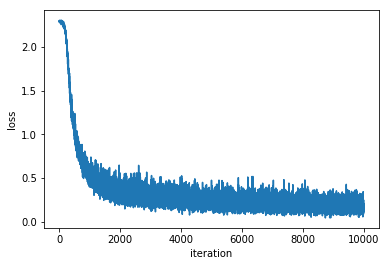

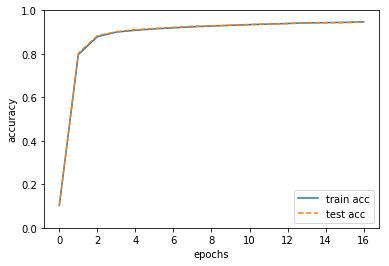

In [18]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print('train_size:{0}'.format(train_size))
print('iter_per_epoch:{0}'.format(iter_per_epoch))



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # iter_per_epochに１回状況を出力する
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 損失関数の推移のグラフ
plt.plot(train_loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()


# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 4.6 まとめ  
- 損失関数はニューラルネットの学習の指標  
- 損失関数が最小となる重みパラメータを探すことがニューラルネットの学習の目的  
- 損失関数のできるだけ小さい値を探す方法として、勾配法
